
Epoch 00001: val_loss improved from inf to 1.53179, saving model to ./model/01-1.5318.hdf5

Epoch 00002: val_loss did not improve from 1.53179

Epoch 00003: val_loss improved from 1.53179 to 1.52792, saving model to ./model/03-1.5279.hdf5

Epoch 00004: val_loss did not improve from 1.52792

Epoch 00005: val_loss did not improve from 1.52792

Epoch 00006: val_loss did not improve from 1.52792

Epoch 00007: val_loss improved from 1.52792 to 1.52678, saving model to ./model/07-1.5268.hdf5

Epoch 00008: val_loss did not improve from 1.52678

Epoch 00009: val_loss did not improve from 1.52678

Epoch 00010: val_loss did not improve from 1.52678

Epoch 00011: val_loss did not improve from 1.52678

Epoch 00012: val_loss improved from 1.52678 to 1.52656, saving model to ./model/12-1.5266.hdf5

Epoch 00013: val_loss did not improve from 1.52656

Epoch 00014: val_loss did not improve from 1.52656

Epoch 00015: val_loss did not improve from 1.52656

Epoch 00016: val_loss did not improve from 1.52


 Test Accuracy: 0.3066


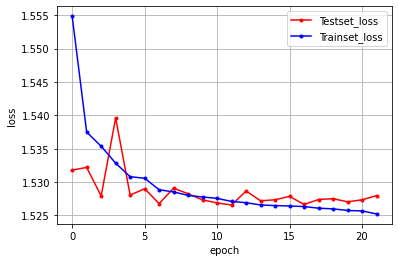

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('../dataset/Europe Hotel Booking Satisfaction Score.csv')

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Type Of Booking'] = le.fit_transform(df['Type Of Booking'])
df['satisfaction'] = le.fit_transform(df['satisfaction'])
df['purpose_of_travel'] = le.fit_transform(df['purpose_of_travel'])
df = df.drop('id', axis = 1)
df = df.dropna()

dataset = df.values
X = dataset[:,0:15]
Y = dataset[:,15]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

Y_train = np_utils.to_categorical(Y_train, 5)
Y_test = np_utils.to_categorical(Y_test, 5)

model = Sequential()
model.add(Dense(256, input_dim=15, activation='relu'))
model.add(Dense(64, input_dim=15, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']


y_loss = history.history['loss']


x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


array([1, 4, 4, ..., 4, 2, 0], dtype=int64)